In [66]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
## Read the datasets
books=pd.read_csv("BX-Books.csv",sep=";",error_bad_lines=False,encoding='latin-1')
users=pd.read_csv("BX-Users.csv",sep=";",error_bad_lines=False,encoding='latin-1')
ratings=pd.read_csv("BX-Book-Ratings.csv",sep=";",error_bad_lines=False,encoding='latin-1')

c:\Users\singh\anaconda3\envs\Books\lib\site-packages\IPython\core\interactiveshell.py:3552: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 24

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
## All three datasets shape comparison
print(f"Books dataset: {books.shape}")
print(f"Users dataset: {users.shape}")
print(f"Book-rating dataset: {ratings.shape}")

Books dataset: (271360, 8)
Users dataset: (278858, 3)
Book-rating dataset: (1149780, 3)


In [7]:
## Check for missing values
print(f"Books dataset(missing_values)\n: {books.isnull().sum()}")

Books dataset(missing_values)
: ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [ ]:
## At which index records are missing
missing_index = books[
    books['Book-Author'].isna() |
    books['Publisher'].isna() |
    books['Image-URL-L'].isna()
].index

missing_records = books.loc[missing_index]

missing_index,missing_records

(Int64Index([128890, 129037, 187689, 209538, 220731, 221678], dtype='int64'),
               ISBN                                         Book-Title  \
 128890  193169656X                                        Tyrant Moon   
 129037  1931696993                                    Finders Keepers   
 187689  9627982032  The Credit Suisse Guide to Managing Your Perso...   
 209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
 220731  2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...   
 221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   
 
             Book-Author Year-Of-Publication  \
 128890  Elaine Corvidae                2002   
 129037  Linnea Sinclair                2001   
 187689              NaN                1995   
 209538             2000   DK Publishing Inc   
 220731             2003           Gallimard   
 221678             2000   DK Publishing Inc   
 
                                                 Publisher  \
 1

#### Handle missing values in Books dataset

In [44]:
# the 187689 record fixes
books.loc[187689, 'Book-Author'] = 'Sophie Pyott'
books.loc[128890, 'Publisher']   = 'Novelbooks Inc'
books.loc[129037, 'Publisher']   = 'Novelbooks Inc'

# the 209538 record fixes
books.loc[209538, 'Book-Author']         = 'Michael Teitelbaum'
books.loc[209538, 'Year-Of-Publication'] = 2000
books.loc[209538, 'Publisher']           = 'DK Publishing Inc'
books.loc[209538, ['Image-URL-S','Image-URL-M','Image-URL-L']] = [
    'http://images.amazon.com/images/P/078946697X.0',
    'http://images.amazon.com/images/P/078946697X.0',
    'http://images.amazon.com/images/P/078946697X.0'
]

# the 220731 record fixes
books.loc[220731,'Book-Author']= 'Jean‑Marie Gustave LeClézio'
books.loc[220731,'Year-Of-Publication']= 2003
books.loc[220731, ['Image-URL-S','Image-URL-M','Image-URL-L']] = [
    'http://images.amazon.com/images/P/2070426769.0',
    'http://images.amazon.com/images/P/2070426769.0',
    'http://images.amazon.com/images/P/2070426769.0'
]

# the 221678 record fixes
books.loc[221678,'Book-Author']= 'James Buckley'
books.loc[221678,'Year-Of-Publication']= 2000
books.loc[221678, ['Image-URL-S','Image-URL-M','Image-URL-L']] = [
    'http://images.amazon.com/images/P/0789466953.0',
    'http://images.amazon.com/images/P/0789466953.0',
    'http://images.amazon.com/images/P/0789466953.0'
]


In [49]:
#'MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEACHER BOOKS)'
books.loc[37487, 'Year-Of-Publication'] = 1991

# 'MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS)'
books.loc[55676, 'Year-Of-Publication'] = 2005

# 'MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS)'
books.loc[37487, 'Book-Author'] = 'Bruce Coville'

# "Alice's Adventures in Wonderland and Through the Looking Glass (Puffin Books)"
books.loc[80264, 'Year-Of-Publication'] = 2003

# 'Field Guide to the Birds of North America, 3rd Ed.'
books.loc[192993, 'Year-Of-Publication'] = 2003

# Crossing America
books.loc[78168, 'Year-Of-Publication'] = 2001

# Outline of European Architecture (Pelican S.)
books.loc[97826, 'Year-Of-Publication'] = 1981

# Three Plays of Eugene Oneill
books.loc[116053, 'Year-Of-Publication'] = 1995

# Setting to current date of project since no information could be found
# Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.
books.loc[118294, 'Year-Of-Publication'] = 2023

# FOREST PEOPLE (Touchstone Books (Hardcover))
books.loc[228173, 'Year-Of-Publication'] = 1987

# In Our Time: Stories (Scribner Classic)
books.loc[240169, 'Year-Of-Publication'] = 1996

# CLOUT
books.loc[246842, 'Year-Of-Publication'] = 1925

# To Have and Have Not
books.loc[255409, 'Year-Of-Publication'] = 1937

# FOOTBALL SUPER TEAMS : FOOTBALL SUPER TEAMS
books.loc[260974, 'Year-Of-Publication'] = 1991

In [9]:
print(f"Users dataset(missing_values):\n{users.isnull().sum()}")

Users dataset(missing_values):
User-ID          0
Location         0
Age         110762
dtype: int64


In [10]:
## Drop Age column(lot of missing values in the age column,imputation would not be beneficial)
users.drop(columns = ['Age'],inplace=True)

In [11]:
print(f"Book-rating dataset(missing_values):\n{ratings.isnull().sum()}")

Book-rating dataset(missing_values):
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [ ]:
## Choose only required features and rename it
books = books[['ISBN','Book-Title','Book-Author','Year-Of-Publication','Publisher','Image-URL-L']]

## Rename books data features
books.rename(columns={"Book-Title":'title',
                     "Book-Author":'author',
                     'Year-Of-Publication':'year',
                     'Publisher':'publisher',
                      'Image-URL-L': 'image_url_l'},inplace=True)


## Rename users data features
users.rename(columns={"User-ID":'user_id',
                     "Location":'location',
                       },inplace=True)


## Rename book rating data features
ratings.rename(columns={"User-ID":'user_id',
                     "Book-Rating":'rating'
                       },inplace=True)




#### EDA

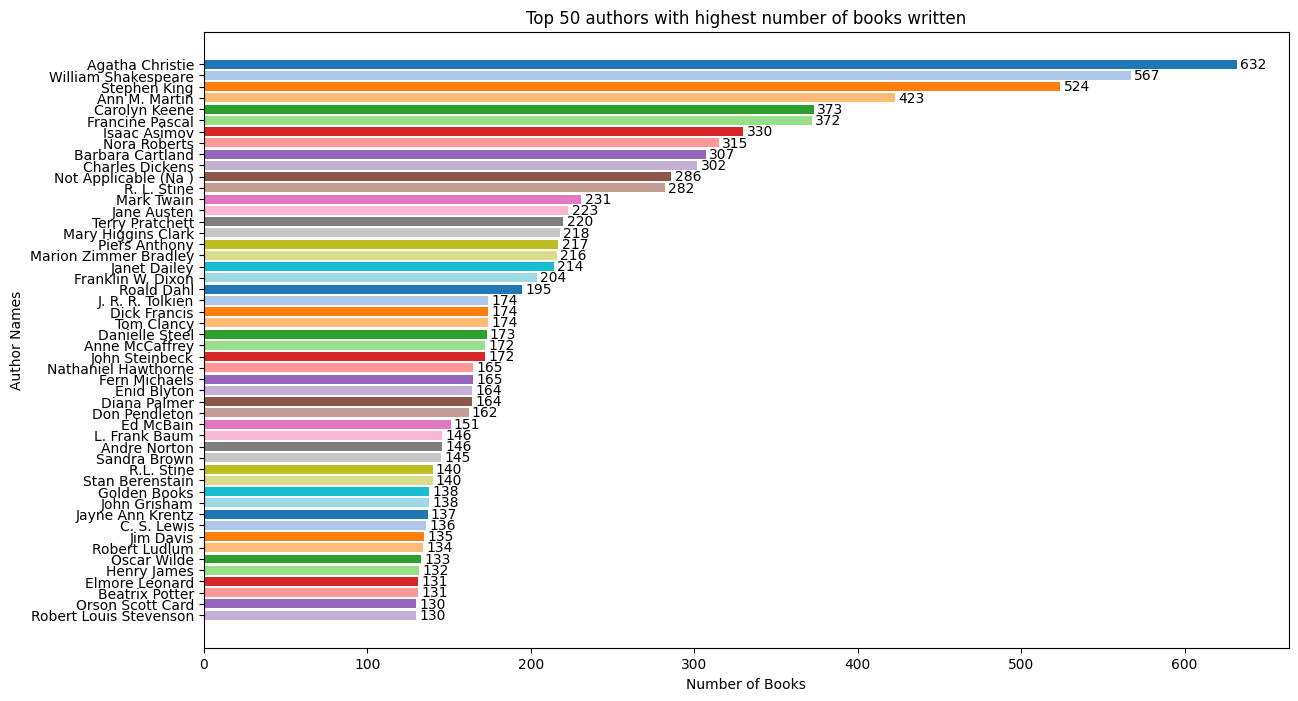

In [78]:
# Prepare the top 50 authors dataframe
top_authors_df = books['author'].value_counts().reset_index()
top_authors_df.columns = ['author', 'Book Count']
top_50_authors = top_authors_df.head(50)

colors = plt.cm.tab20(np.linspace(0, 1, 20))  # tab20 has 20 unique colors
colors = np.tile(colors, (int(np.ceil(len(top_50_authors) / 20)), 1))[:len(top_50_authors)]

# Plot bars
plt.figure(figsize=(14, 8))
bars = plt.barh(top_50_authors['author'], top_50_authors['Book Count'], color=colors)

plt.xlabel('Number of Books')
plt.ylabel('Author Names')
plt.title('Top 50 authors with highest number of books written')
plt.gca().invert_yaxis()

# Add labels at the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 2,              # Position slightly after bar end
             bar.get_y() + bar.get_height()/2,
             f'{int(width)}',        # Count as integer
             va='center')

plt.show()

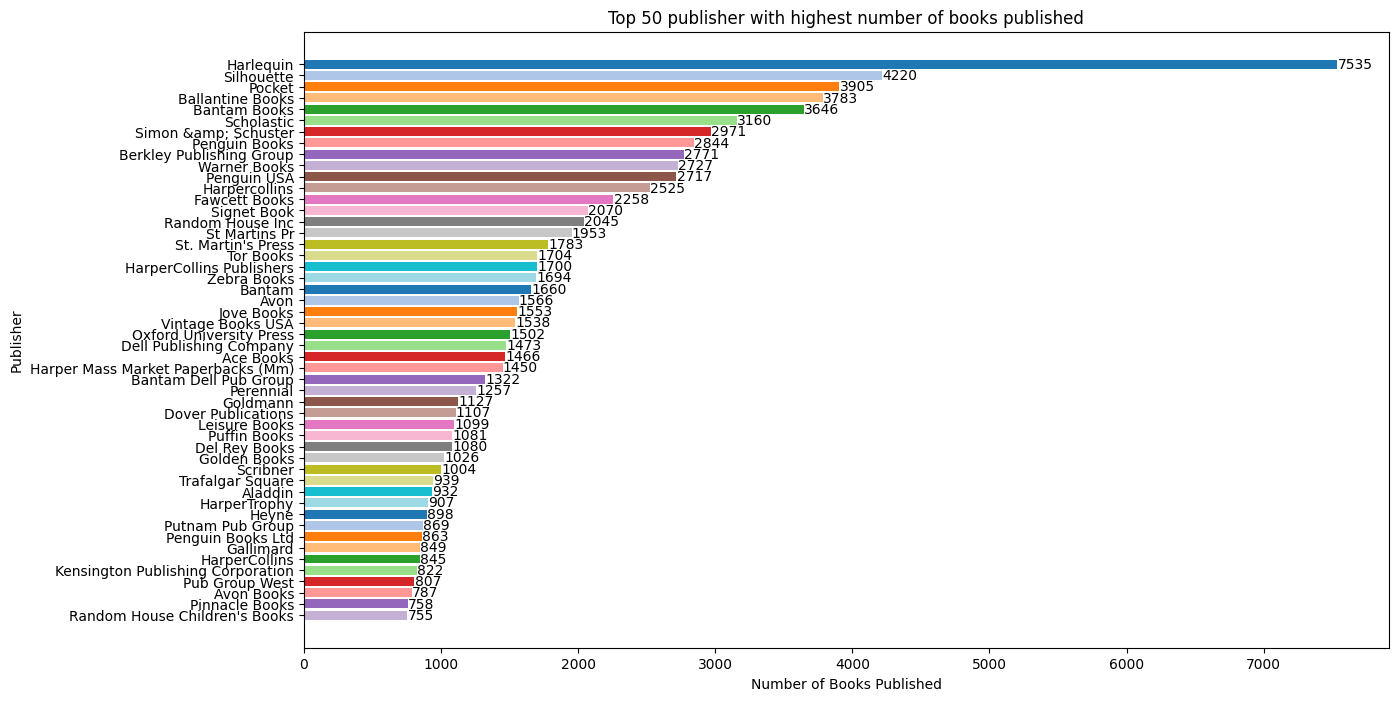

In [75]:
# Prepare the top 50 Publishers dataframe
top_publisher_df = books['publisher'].value_counts().reset_index()
top_publisher_df.columns = ['publisher', 'Book Count']
top_50_publisher = top_publisher_df.head(50)


colors = plt.cm.tab20(np.linspace(0, 1, 20))  # tab20 has 20 unique colors
colors = np.tile(colors, (int(np.ceil(len(top_50_publisher) / 20)), 1))[:len(top_50_publisher)]

# Plot bars
plt.figure(figsize=(14, 8))
bars = plt.barh(top_50_publisher['publisher'], top_50_publisher['Book Count'], color=colors)

plt.xlabel('Number of Books Published')
plt.ylabel('Publisher')
plt.title('Top 50 publisher with highest number of books published')
plt.gca().invert_yaxis()

# Add labels at the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 2,              # Position slightly after bar end
             bar.get_y() + bar.get_height()/2,
             f'{int(width)}',        # Count as integer
             va='center')

plt.show()

([<matplotlib.patches.Wedge at 0x1ee18a61b48>,
 [Text(-1.0191231537439152, -0.41399033503580324, '0'),
  Text(0.77090772346771, -0.7846663506853299, '1'),
  Text(0.7805585220088765, -0.7750667027548779, '2'),
  Text(0.7988743085175046, -0.756174476685559, '3'),
  Text(0.8289891463901289, -0.7230331909168247, '4'),
  Text(0.9356853762118099, -0.5783535914502165, '5'),
  Text(1.046399713068631, -0.3391867339532708, '6'),
  Text(1.0999926164845, -0.004030344846781876, '7'),
  Text(0.9712460497412142, 0.5164117648370213, '8'),
  Text(0.6338669845787941, 0.899006477096237, '9'),
  Text(0.234455731246907, 1.074723457492893, '10')],
 [Text(-0.55588535658759, -0.22581291001952902, '62.3%'),
  Text(0.42049512189147814, -0.4279998276465435, '0.2%'),
  Text(0.4257591938230236, -0.42276365604811517, '0.2%'),
  Text(0.4357496228277297, -0.4124588054648503, '0.5%'),
  Text(0.45217589803097935, -0.3943817405000862, '0.8%'),
  Text(0.5103738415700781, -0.3154655953364817, '4.4%'),
  Text(0.57076347985

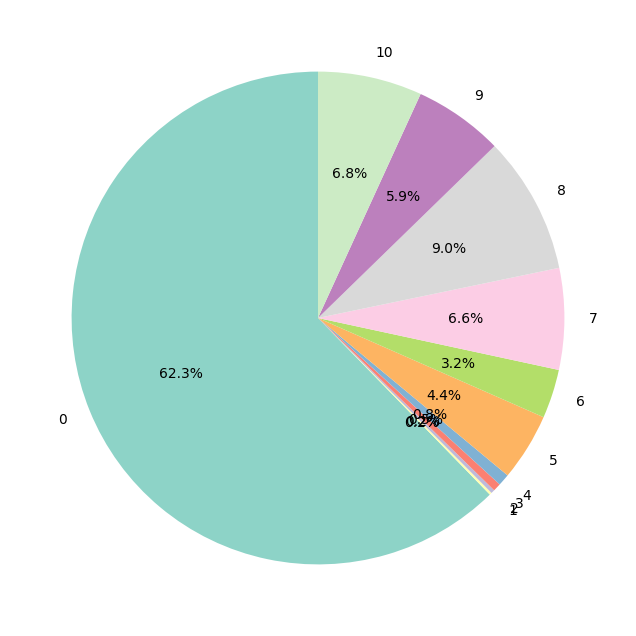

In [ ]:
## Distribution of rating over total books
rating_counts = ratings['rating'].value_counts().sort_index()


colors = plt.cm.Set3(range(len(rating_counts)))

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    rating_counts,
    labels=rating_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)

In [83]:
print(f"Books dataset: {books.shape}")
print(f"Users dataset: {users.shape}")
print(f"Book-rating dataset: {ratings.shape}")

Books dataset: (271360, 6)
Users dataset: (278858, 2)
Book-rating dataset: (1149780, 3)


In [84]:
print(f"Books dataset columns: {books.columns}")
print(f"Users dataset columns: {users.columns}")
print(f"Ratings dataset columns: {ratings.columns}")


Books dataset columns: Index(['ISBN', 'title', 'author', 'year', 'publisher', 'image_url_l'], dtype='object')
Users dataset columns: Index(['user_id', 'location'], dtype='object')
Ratings dataset columns: Index(['user_id', 'ISBN', 'rating'], dtype='object')


In [86]:
## Create final dataset

## Store only those users who had atleast rated more than 200 books
x = ratings['user_id'].value_counts() > 200

x[x].shape

(899,)

In [87]:
y = x[x].index
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [88]:
## Filter records 
ratings = ratings[ratings['user_id'].isin(y)]
ratings.shape

(526356, 3)

In [90]:
## Now join ratings dataset with "Books" dataset
ratings_with_books = ratings.merge(books,on='ISBN')
ratings_with_books.shape

(487671, 8)

In [91]:
number_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()
number_rating.rename(columns={'rating':'num_of_rating'},inplace=True)

In [ ]:
final_rating = ratings_with_books.merge(number_rating,on='title')

# Filter those books which got at least 50 rating of user
final_rating = final_rating[final_rating['num_of_rating'] >= 50 ]

## Drop duplicates
final_rating.drop_duplicates(['user_id','title'],inplace=True)

In [ ]:
## Create Pivot table
book_pivot=final_rating.pivot_table(columns='user_id',index='title',values='rating')
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [100]:
book_pivot.fillna(0,inplace=True)
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)
book_sparse

<742x888 sparse matrix of type '<class 'numpy.float64'>'
	with 14942 stored elements in Compressed Sparse Row format>

In [102]:
type(book_sparse)

scipy.sparse.csr.csr_matrix